#**MODEL FITTING AND TRAINING**

In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np

In [2]:
train = ImageDataGenerator(
    validation_split=0.3,
    rescale=1/255,
    rotation_range=10,      # Slight rotations
    shear_range=0.1,        # Slight shearing
    brightness_range=(0.8, 1.2),  # Slight brightness changes
    fill_mode='nearest'     # Fill in new pixels after a transformation
)

validation = ImageDataGenerator(
    validation_split=0.3,
    rescale=1/255,
    rotation_range=10,      # Slight rotations
    shear_range=0.1,        # Slight shearing
    brightness_range=(0.8, 1.2),  # Slight brightness changes
    fill_mode='nearest'     # Fill in new pixels after a transformation
)

In [29]:
train_dataset = train.flow_from_directory('70cm', target_size = (30,200), batch_size = 5, shuffle=False, class_mode = 'categorical', subset='training')
validation_dataset = train.flow_from_directory('70cm', target_size = (30,200), batch_size = 5, shuffle=False, class_mode = 'categorical', subset='validation')

Found 1400 images belonging to 5 classes.
Found 600 images belonging to 5 classes.


In [30]:
train_dataset.class_indices

{'Kanan': 0, 'Kiri': 1, 'Maju': 2, 'Mundur': 3, 'Stop': 4}

In [31]:
# MODEL 3
model = tf.keras.models.Sequential([
    # First convolutional layer
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(30, 200, 3)),
    tf.keras.layers.MaxPool2D(2,2),

    # Dropout layer added after max pooling
    #tf.keras.layers.Dropout(0.25),  # Typically, a dropout rate between 0.2 and 0.5 is used

    # Second convolutional layer
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),

    # Dropout layer added after max pooling
    #tf.keras.layers.Dropout(0.25),  # Typically, a dropout rate between 0.2 and 0.5 is used

    # Flatten the output and feed it into a dense layer
    tf.keras.layers.Flatten(),

    # Dense layer with fewer neurons
    tf.keras.layers.Dense(128, activation='relu' ),

    # Dropout layer added before the output layer
    #tf.keras.layers.Dropout(0.5),  # Typically, a dropout rate between 0.2 and 0.5 is used

    # Output layer
    tf.keras.layers.Dense(5, activation='softmax')
])

In [171]:
# MODEL 4

model = tf.keras.models.Sequential([
    # First convolutional layer
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(30, 200, 3), padding='same'),
    tf.keras.layers.MaxPool2D(2,2),

    # Dropout layer added after max pooling
    #tf.keras.layers.Dropout(0.25),  # Typically, a dropout rate between 0.2 and 0.5 is used

    # Second convolutional layer
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    tf.keras.layers.MaxPool2D(2,2),

    # Dropout layer added after max pooling
    #tf.keras.layers.Dropout(0.25),  # Typically, a dropout rate between 0.2 and 0.5 is used

    # Third convolutional layer
    tf.keras.layers.Conv2D(128, (3,3), activation='relu', padding='same'),
    tf.keras.layers.MaxPool2D(2,2),

    # Dropout layer added after max pooling
    #tf.keras.layers.Dropout(0.25),  # Typically, a dropout rate between 0.2 and 0.5 is used

    # Fourth convolutional layer
    #tf.keras.layers.Conv2D(256, (3,3), activation='relu', padding='same'),
    #tf.keras.layers.MaxPool2D(2,2),

    # Dropout layer added after max pooling
    tf.keras.layers.Dropout(0.25),  # Typically, a dropout rate between 0.2 and 0.5 is used

    # Flatten the output and feed it into a dense layer
    tf.keras.layers.Flatten(),

    # Dense layer with fewer neurons
    tf.keras.layers.Dense(256, activation='relu'),

    # Dropout layer added before the output layer
    tf.keras.layers.Dropout(0.5),  # Typically, a dropout rate between 0.2 and 0.5 is used

    # Output layer
    tf.keras.layers.Dense(5, activation='softmax')
])


In [28]:
del model

In [32]:
rlrop = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=100)

early_stop = EarlyStopping(
    monitor='val_loss',  # Metric to monitor
    patience=5,          # Number of epochs with no improvement after which training will be stopped
    verbose=1,           # To log when training is being stopped
    restore_best_weights=True  # Restores model weights from the epoch with the best value of the monitored metric
)

In [33]:
model.compile(loss= 'categorical_crossentropy',
             optimizer = 'Adam',
             metrics = ['accuracy'])

In [34]:
model_fit = model.fit(
    train_dataset,
    steps_per_epoch=10,
    epochs=40,
    validation_data=validation_dataset,
    callbacks=[rlrop, early_stop],
    verbose=2
)

Epoch 1/40
10/10 - 2s - loss: 2.4530 - accuracy: 0.4200 - val_loss: 1.7756 - val_accuracy: 0.2350 - lr: 0.0010 - 2s/epoch - 223ms/step
Epoch 2/40
10/10 - 1s - loss: 1.5742 - accuracy: 0.4000 - val_loss: 1.5661 - val_accuracy: 0.3950 - lr: 0.0010 - 1s/epoch - 145ms/step
Epoch 3/40
10/10 - 1s - loss: 1.5204 - accuracy: 0.5400 - val_loss: 1.5263 - val_accuracy: 0.5150 - lr: 0.0010 - 1s/epoch - 148ms/step
Epoch 4/40
10/10 - 1s - loss: 1.4424 - accuracy: 0.5600 - val_loss: 1.4370 - val_accuracy: 0.5017 - lr: 0.0010 - 1s/epoch - 148ms/step
Epoch 5/40
10/10 - 1s - loss: 1.3084 - accuracy: 0.4600 - val_loss: 1.3251 - val_accuracy: 0.4467 - lr: 0.0010 - 1s/epoch - 147ms/step
Epoch 6/40
10/10 - 2s - loss: 1.1827 - accuracy: 0.4800 - val_loss: 1.2595 - val_accuracy: 0.5067 - lr: 0.0010 - 2s/epoch - 156ms/step
Epoch 7/40
10/10 - 1s - loss: 0.6044 - accuracy: 0.7800 - val_loss: 1.2586 - val_accuracy: 0.5083 - lr: 0.0010 - 1s/epoch - 147ms/step
Epoch 8/40
10/10 - 2s - loss: 1.3540 - accuracy: 0.3600

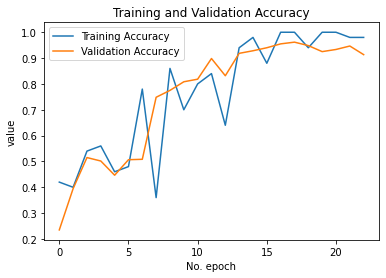

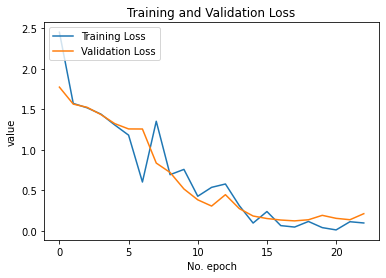

In [35]:
plt.plot(model_fit.history['accuracy'], label='Training Accuracy')
plt.plot(model_fit.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

plt.plot(model_fit.history['loss'], label='Training Loss')
plt.plot(model_fit.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.ylabel('value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

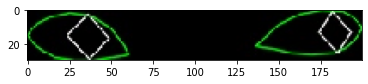

1/1 [==============================] - 0s 75ms/step
Kanan


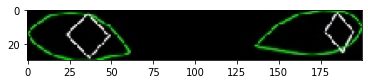

1/1 [==============================] - 0s 24ms/step
Kanan


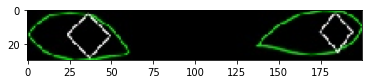

1/1 [==============================] - 0s 22ms/step
Kanan


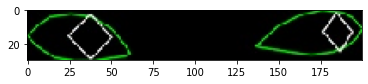

1/1 [==============================] - 0s 23ms/step
Kanan


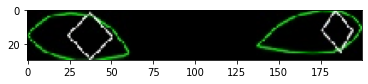

1/1 [==============================] - 0s 23ms/step
Kanan


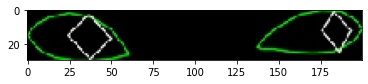

1/1 [==============================] - 0s 23ms/step
Kanan


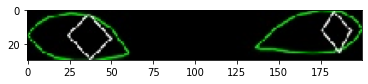

1/1 [==============================] - 0s 24ms/step
Kanan


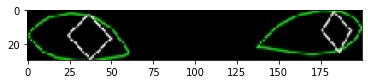

1/1 [==============================] - 0s 23ms/step
Kanan


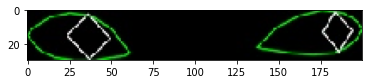

1/1 [==============================] - 0s 24ms/step
Kanan


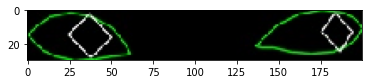

1/1 [==============================] - 0s 22ms/step
Kanan


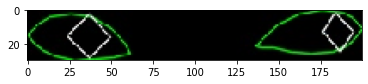

1/1 [==============================] - 0s 22ms/step
Kanan


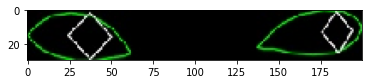

1/1 [==============================] - 0s 22ms/step
Kanan


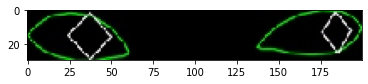

1/1 [==============================] - 0s 22ms/step
Kanan


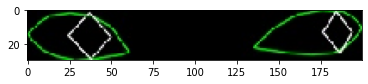

1/1 [==============================] - 0s 28ms/step
Kanan


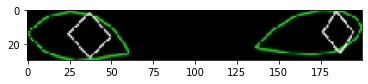

1/1 [==============================] - 0s 25ms/step
Kanan


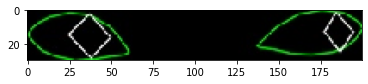

1/1 [==============================] - 0s 22ms/step
Kanan


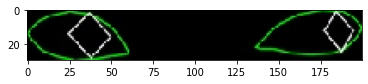

1/1 [==============================] - 0s 23ms/step
Kanan


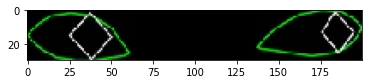

1/1 [==============================] - 0s 22ms/step
Kanan


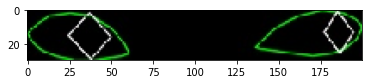

1/1 [==============================] - 0s 22ms/step
Kanan


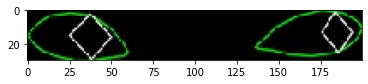

1/1 [==============================] - 0s 22ms/step
Kanan


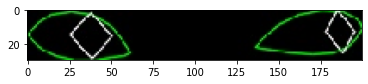

1/1 [==============================] - 0s 22ms/step
Kanan


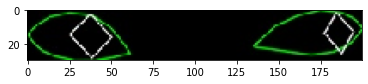

1/1 [==============================] - 0s 23ms/step
Kanan


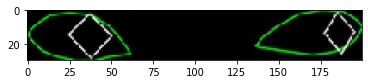

1/1 [==============================] - 0s 22ms/step
Kanan


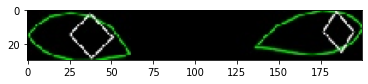

1/1 [==============================] - 0s 22ms/step
Kanan


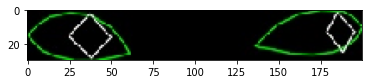

1/1 [==============================] - 0s 21ms/step
Kanan


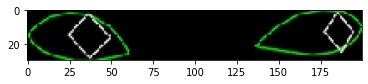

1/1 [==============================] - 0s 22ms/step
Kanan


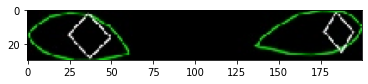

1/1 [==============================] - 0s 22ms/step
Kanan


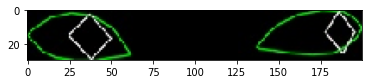

1/1 [==============================] - 0s 34ms/step
Kanan


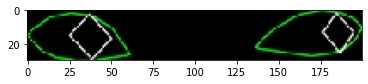

1/1 [==============================] - 0s 22ms/step
Kanan


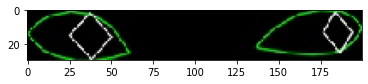

1/1 [==============================] - 0s 23ms/step
Kanan


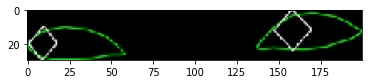

1/1 [==============================] - 0s 21ms/step
Kiri


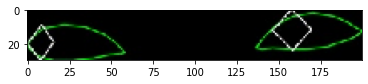

1/1 [==============================] - 0s 23ms/step
Kiri


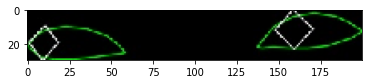

1/1 [==============================] - 0s 41ms/step
Kiri


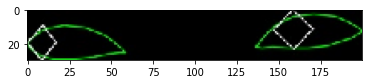

1/1 [==============================] - 0s 23ms/step
Kiri


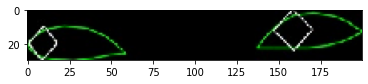

1/1 [==============================] - 0s 23ms/step
Kiri


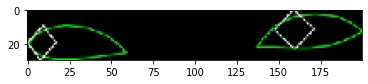

1/1 [==============================] - 0s 22ms/step
Kiri


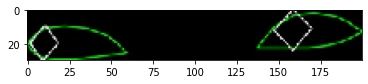

1/1 [==============================] - 0s 26ms/step
Kiri


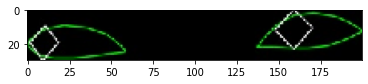

1/1 [==============================] - 0s 44ms/step
Kiri


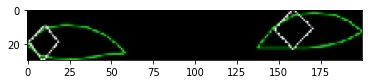

1/1 [==============================] - 0s 25ms/step
Kiri


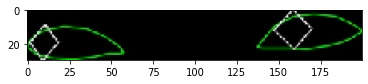

1/1 [==============================] - 0s 22ms/step
Kiri


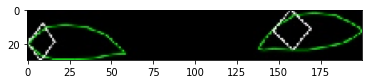

1/1 [==============================] - 0s 24ms/step
Kiri


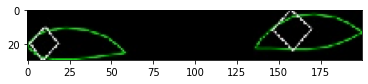

1/1 [==============================] - 0s 22ms/step
Kiri


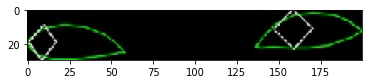

1/1 [==============================] - 0s 22ms/step
Kiri


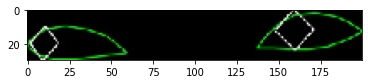

1/1 [==============================] - 0s 28ms/step
Kiri


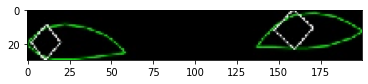

1/1 [==============================] - 0s 23ms/step
Kiri


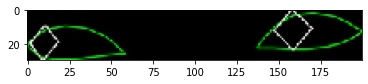

1/1 [==============================] - 0s 23ms/step
Kiri


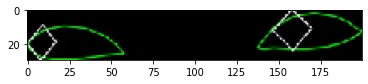

1/1 [==============================] - 0s 46ms/step
Kiri


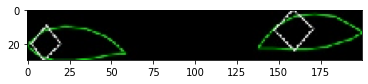

1/1 [==============================] - 0s 25ms/step
Kiri


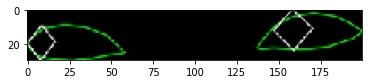

1/1 [==============================] - 0s 22ms/step
Kiri


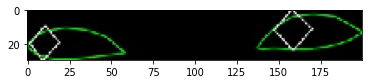

1/1 [==============================] - 0s 27ms/step
Kiri


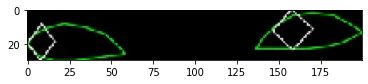

1/1 [==============================] - 0s 55ms/step
Kiri


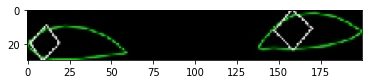

1/1 [==============================] - 0s 22ms/step
Kiri


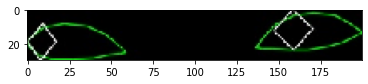

1/1 [==============================] - 0s 22ms/step
Kiri


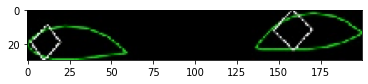

1/1 [==============================] - 0s 23ms/step
Kiri


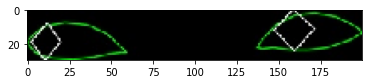

1/1 [==============================] - 0s 23ms/step
Kiri


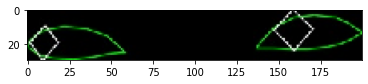

1/1 [==============================] - 0s 22ms/step
Kiri


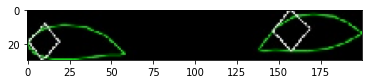

1/1 [==============================] - 0s 24ms/step
Kiri


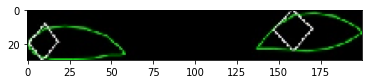

1/1 [==============================] - 0s 25ms/step
Kiri


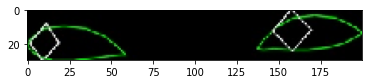

1/1 [==============================] - 0s 52ms/step
Kiri


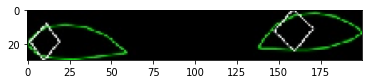

1/1 [==============================] - 0s 23ms/step
Kiri


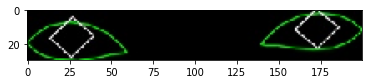

1/1 [==============================] - 0s 25ms/step
Maju


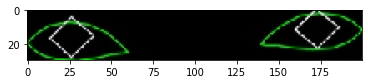

1/1 [==============================] - 0s 24ms/step
Maju


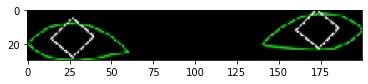

1/1 [==============================] - 0s 25ms/step
Maju


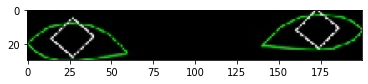

1/1 [==============================] - 0s 21ms/step
Maju


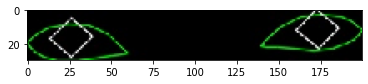

1/1 [==============================] - 0s 24ms/step
Maju


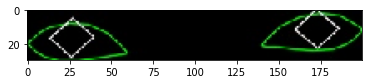

1/1 [==============================] - 0s 31ms/step
Maju


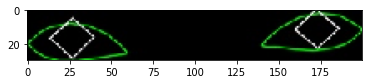

1/1 [==============================] - 0s 23ms/step
Maju


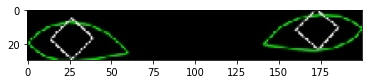

1/1 [==============================] - 0s 24ms/step
Maju


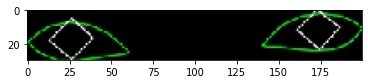

1/1 [==============================] - 0s 23ms/step
Maju


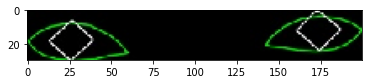

1/1 [==============================] - 0s 25ms/step
Maju


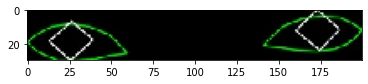

1/1 [==============================] - 0s 23ms/step
Maju


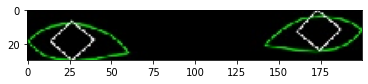

1/1 [==============================] - 0s 24ms/step
Maju


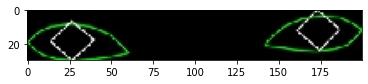

1/1 [==============================] - 0s 28ms/step
Maju


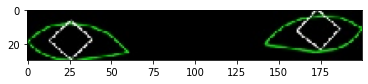

1/1 [==============================] - 0s 23ms/step
Maju


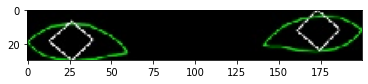

1/1 [==============================] - 0s 24ms/step
Maju


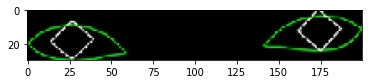

1/1 [==============================] - 0s 47ms/step
Maju


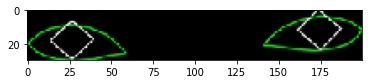

1/1 [==============================] - 0s 24ms/step
Maju


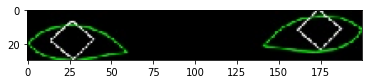

1/1 [==============================] - 0s 23ms/step
Maju


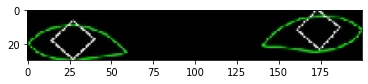

1/1 [==============================] - 0s 42ms/step
Maju


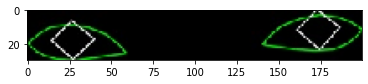

1/1 [==============================] - 0s 24ms/step
Maju


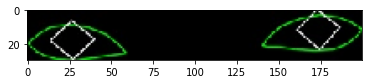

1/1 [==============================] - 0s 23ms/step
Maju


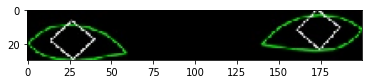

1/1 [==============================] - 0s 45ms/step
Maju


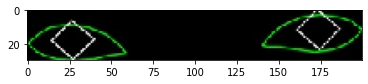

1/1 [==============================] - 0s 24ms/step
Maju


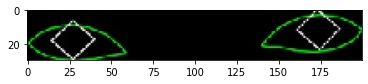

1/1 [==============================] - 0s 23ms/step
Maju


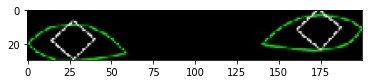

1/1 [==============================] - 0s 53ms/step
Maju


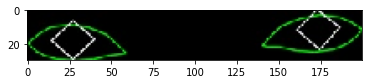

1/1 [==============================] - 0s 23ms/step
Maju


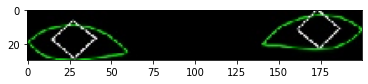

1/1 [==============================] - 0s 23ms/step
Maju


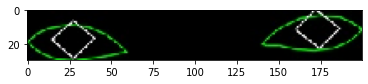

1/1 [==============================] - 0s 47ms/step
Maju


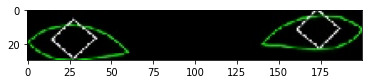

1/1 [==============================] - 0s 23ms/step
Maju


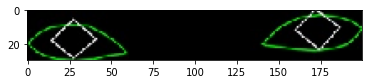

1/1 [==============================] - 0s 23ms/step
Maju


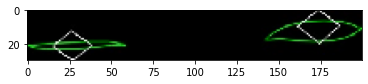

1/1 [==============================] - 0s 53ms/step
Stop


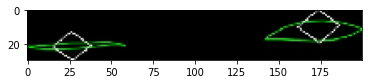

1/1 [==============================] - 0s 23ms/step
Stop


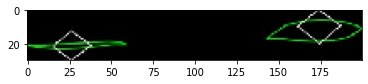

1/1 [==============================] - 0s 23ms/step
Stop


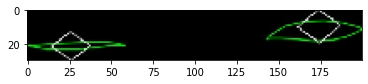

1/1 [==============================] - 0s 46ms/step
Stop


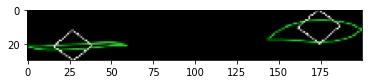

1/1 [==============================] - 0s 23ms/step
Stop


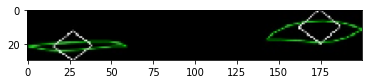

1/1 [==============================] - 0s 23ms/step
Stop


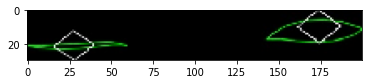

1/1 [==============================] - 0s 26ms/step
Stop


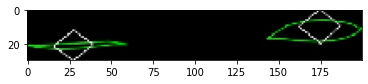

1/1 [==============================] - 0s 24ms/step
Stop


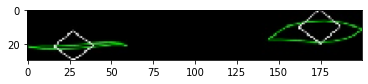

1/1 [==============================] - 0s 45ms/step
Stop


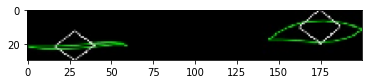

1/1 [==============================] - 0s 23ms/step
Stop


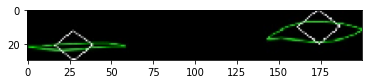

1/1 [==============================] - 0s 25ms/step
Stop


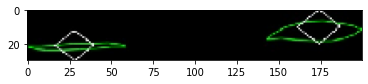

1/1 [==============================] - 0s 49ms/step
Stop


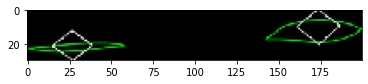

1/1 [==============================] - 0s 23ms/step
Stop


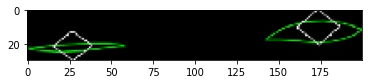

1/1 [==============================] - 0s 25ms/step
Stop


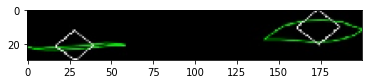

1/1 [==============================] - 0s 50ms/step
Stop


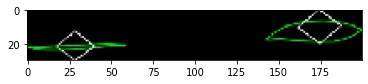

1/1 [==============================] - 0s 22ms/step
Stop


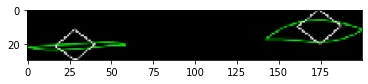

1/1 [==============================] - 0s 23ms/step
Stop


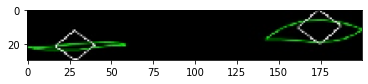

1/1 [==============================] - 0s 23ms/step
Stop


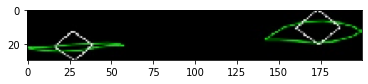

1/1 [==============================] - 0s 25ms/step
Stop


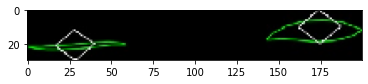

1/1 [==============================] - 0s 23ms/step
Stop


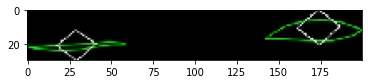

1/1 [==============================] - 0s 21ms/step
Stop


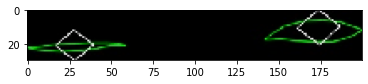

1/1 [==============================] - 0s 53ms/step
Stop


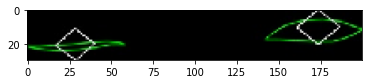

1/1 [==============================] - 0s 23ms/step
Stop


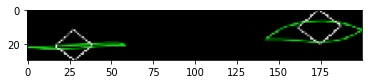

1/1 [==============================] - 0s 23ms/step
Stop


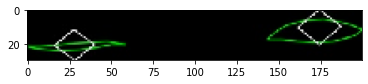

1/1 [==============================] - 0s 27ms/step
Stop


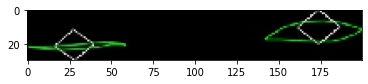

1/1 [==============================] - 0s 23ms/step
Stop


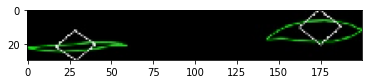

1/1 [==============================] - 0s 49ms/step
Stop


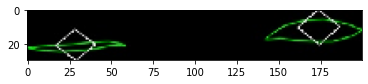

1/1 [==============================] - 0s 24ms/step
Stop


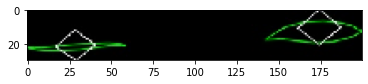

1/1 [==============================] - 0s 26ms/step
Stop


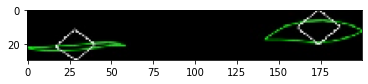

1/1 [==============================] - 0s 50ms/step
Stop


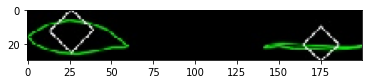

1/1 [==============================] - 0s 23ms/step
Mundur


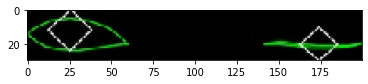

1/1 [==============================] - 0s 27ms/step
Mundur


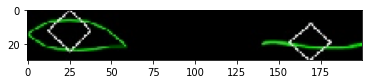

1/1 [==============================] - 0s 28ms/step
Mundur


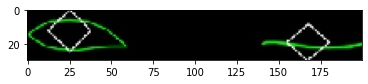

1/1 [==============================] - 0s 23ms/step
Mundur


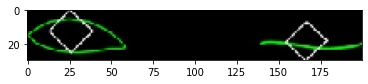

1/1 [==============================] - 0s 50ms/step
Mundur


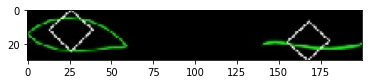

1/1 [==============================] - 0s 23ms/step
Mundur


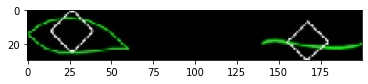

1/1 [==============================] - 0s 24ms/step
Mundur


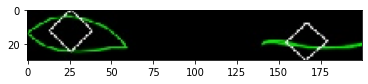

1/1 [==============================] - 0s 29ms/step
Mundur


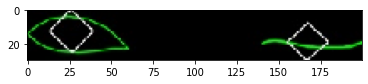

1/1 [==============================] - 0s 24ms/step
Mundur


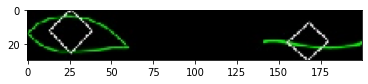

1/1 [==============================] - 0s 23ms/step
Mundur


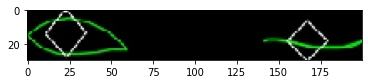

1/1 [==============================] - 0s 23ms/step
Mundur


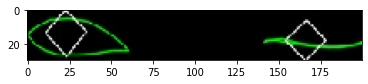

1/1 [==============================] - 0s 24ms/step
Mundur


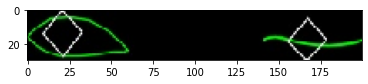

1/1 [==============================] - 0s 23ms/step
Mundur


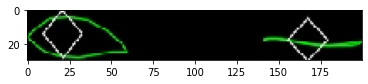

1/1 [==============================] - 0s 29ms/step
Mundur


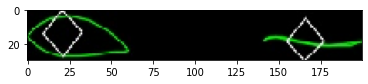

1/1 [==============================] - 0s 42ms/step
Mundur


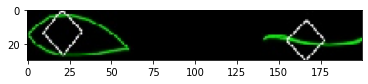

1/1 [==============================] - 0s 23ms/step
Mundur


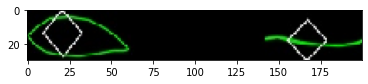

1/1 [==============================] - 0s 24ms/step
Mundur


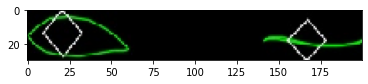

1/1 [==============================] - 0s 28ms/step
Mundur


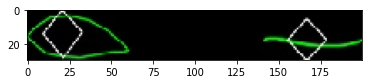

1/1 [==============================] - 0s 23ms/step
Mundur


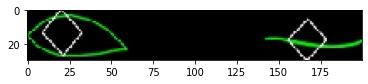

1/1 [==============================] - 0s 47ms/step
Mundur


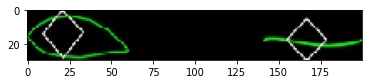

1/1 [==============================] - 0s 29ms/step
Mundur


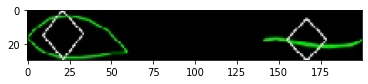

1/1 [==============================] - 0s 23ms/step
Mundur


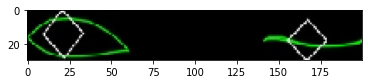

1/1 [==============================] - 0s 29ms/step
Mundur


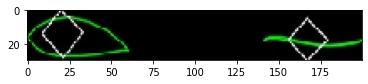

1/1 [==============================] - 0s 24ms/step
Mundur


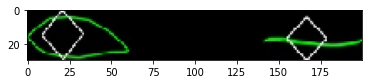

1/1 [==============================] - 0s 56ms/step
Mundur


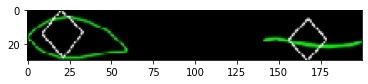

1/1 [==============================] - 0s 35ms/step
Mundur


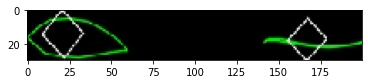

1/1 [==============================] - 0s 24ms/step
Mundur


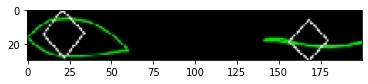

1/1 [==============================] - 0s 33ms/step
Mundur


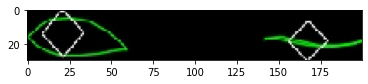

1/1 [==============================] - 0s 23ms/step
Mundur


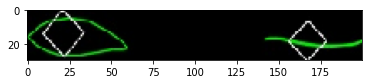

1/1 [==============================] - 0s 27ms/step
Mundur


In [176]:
dir_path = 'C:\\TA\\trainCNN\\test\\30cm'

for i in os.listdir(dir_path):
    img = image.load_img(dir_path+'//'+ i, target_size=(30,200))
    plt.imshow(img)
    plt.show()

    X = image.img_to_array(img)
    X = np.expand_dims(X, axis = 0)
    images = np.vstack([X])
    predict_result = model.predict(images)[0]
    if predict_result[0] == 1 :
        print('Kanan')
    elif predict_result[1] == 1 :
        print('Kiri')
    elif predict_result[2] == 1 :
        print('Maju')
    elif predict_result[3] == 1 :
        print('Mundur')
    elif predict_result[4] == 1 :
        print('Stop')
    else :
        print('None of Them')

In [177]:
# serialize model to JSON
model_json = model.to_json()
with open("model_5_t.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save("model_5_t.h5")
print("Saved model to disk")

Saved model to disk


# **MODEL TESTING AND VALIDATING**

In [1]:
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
from keras.callbacks import ReduceLROnPlateau
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np
import pandas as pd

In [26]:
# Muat model yang telah dilatih dari file model.h5
lmodel = load_model('C:\\TA\\trainCNN\\model_5_t.h5')

In [64]:
# Inisialisasi objek ImageDataGenerator untuk data pelatihan
train_datagen = ImageDataGenerator(rescale = 1/255)

# Memuat data pelatihan dari direktori
train_dataset = train_datagen.flow_from_directory('30cm/validation/',
                                                  target_size=(30, 200),  # Ukuran gambar yang diinginkan
                                                  batch_size=3,
                                                  shuffle=False,
                                                  class_mode='categorical')

Found 600 images belonging to 5 classes.


In [65]:
num_batches = len(train_dataset)

y_train_true = []
y_train_pred = []

for _ in range(num_batches):
    X_train, y_batch_true = train_dataset.next()
    y_batch_pred = lmodel.predict(X_train)
    y_batch_pred = np.argmax(y_batch_pred, axis=1)

    y_train_true.extend(np.argmax(y_batch_true, axis=1))
    y_train_pred.extend(y_batch_pred)

1/1 [==============================] - 0s 28ms/step


In [66]:
# Mengubah list menjadi array numpy
y_train_true = np.array(y_train_true)
y_train_pred = np.array(y_train_pred)

# Menghitung confusion matrix
cm_train = confusion_matrix(y_train_true, y_train_pred)

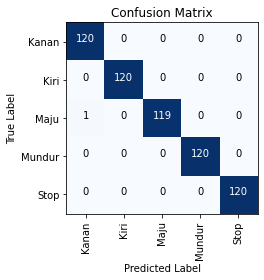

In [67]:
# Definisikan label kelas
class_names = ['Kanan',
               'Kiri',
               'Maju',
               'Mundur',
               'Stop'
              ]  # Nama kelas

# Tampilkan confusion matrix menggunakan matplotlib
plt.imshow(cm_train, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
# plt.colorbar()

# Atur label pada sumbu x dan y
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=90)
plt.yticks(tick_marks, class_names)

# Tulis nilai pada setiap sel confusion matrix
thresh = cm_train.max() / 2.
for i, j in np.ndindex(cm_train.shape):
    plt.text(j, i, format(cm_train[i, j], 'd'),
             horizontalalignment="center",
             color="white" if cm_train[i, j] > thresh else "black")

# Atur label pada sumbu x dan y
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Tampilkan plot confusion matrix
plt.tight_layout()
plt.show()

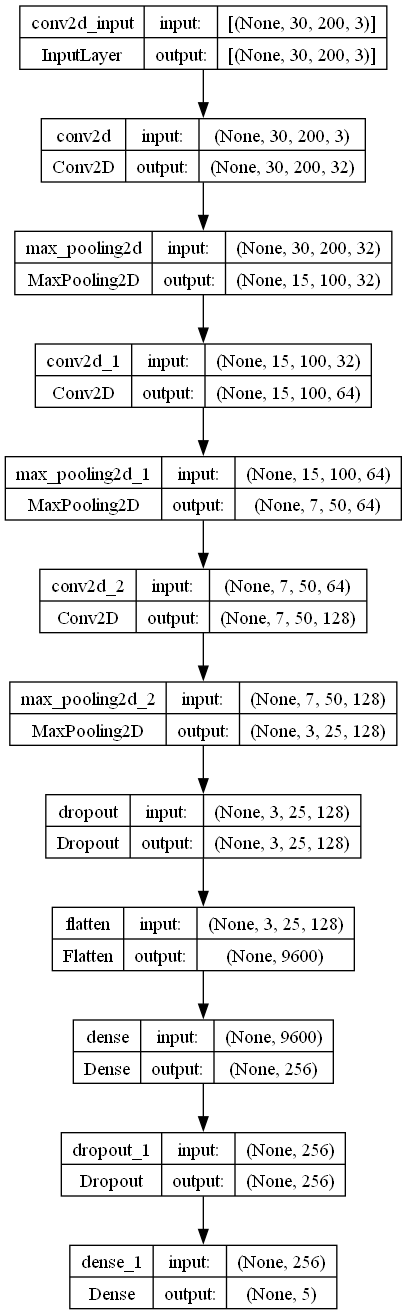

In [1]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.utils.vis_utils import plot_model
from keras.callbacks import ReduceLROnPlateau


import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin'

# Define your model architecture
model = tf.keras.models.Sequential([
    # First convolutional layer
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(30, 200, 3), padding='same'),
    tf.keras.layers.MaxPool2D(2,2),

    # Second convolutional layer
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    tf.keras.layers.MaxPool2D(2,2),

    # Third convolutional layer
    tf.keras.layers.Conv2D(128, (3,3), activation='relu', padding='same'),
    tf.keras.layers.MaxPool2D(2,2),

    # Dropout layer added after max pooling
    tf.keras.layers.Dropout(0.25),  # Typically, a dropout rate between 0.2 and 0.5 is used

    # Flatten the output and feed it into a dense layer
    tf.keras.layers.Flatten(),

    # Dense layer with fewer neurons
    tf.keras.layers.Dense(256, activation='relu'),

    # Dropout layer added before the output layer
    tf.keras.layers.Dropout(0.5),  # Typically, a dropout rate between 0.2 and 0.5 is used

    # Output layer
    tf.keras.layers.Dense(5, activation='softmax')
])

# Define ReduceLROnPlateau callback
rlrop = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=100)

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

# Visualize the model architecture
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

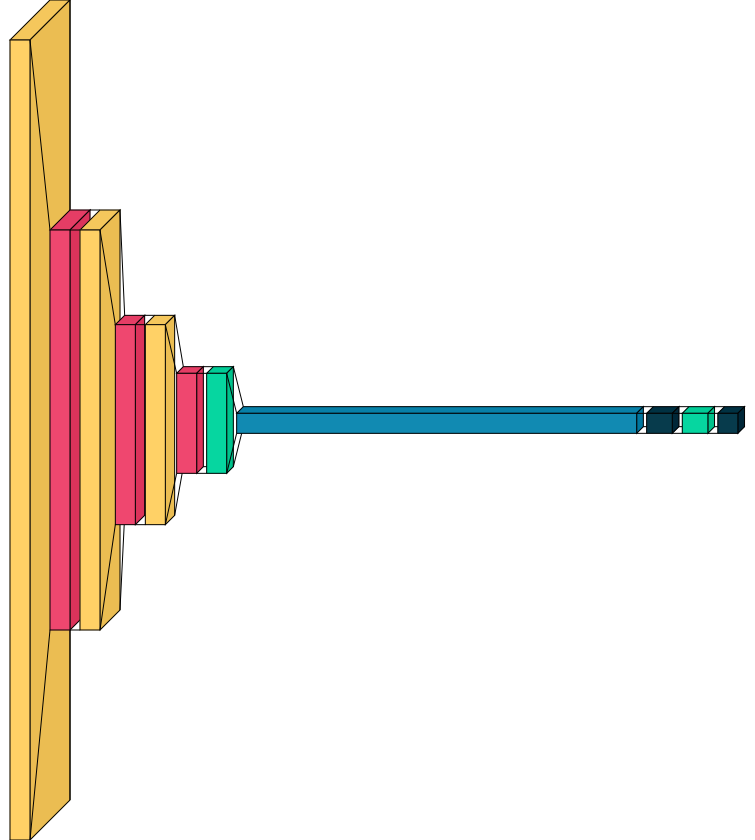

In [5]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define your model architecture
model = tf.keras.models.Sequential([
    # First convolutional layer
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(30, 200, 3), padding='same'),
    tf.keras.layers.MaxPool2D(2,2),

    # Second convolutional layer
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    tf.keras.layers.MaxPool2D(2,2),

    # Third convolutional layer
    tf.keras.layers.Conv2D(128, (3,3), activation='relu', padding='same'),
    tf.keras.layers.MaxPool2D(2,2),

    # Dropout layer added after max pooling
    tf.keras.layers.Dropout(0.25),  # Typically, a dropout rate between 0.2 and 0.5 is used

    # Flatten the output and feed it into a dense layer
    tf.keras.layers.Flatten(),

    # Dense layer with fewer neurons
    tf.keras.layers.Dense(256, activation='relu'),

    # Dropout layer added before the output layer
    tf.keras.layers.Dropout(0.5),  # Typically, a dropout rate between 0.2 and 0.5 is used

    # Output layer
    tf.keras.layers.Dense(5, activation='softmax')
])

# Define ReduceLROnPlateau callback
rlrop = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=100)

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

# Visualize the architecture using Visualkeras
import visualkeras
visualkeras.layered_view(model).show()  # Display using your system viewer

visualkeras.layered_view(model, to_file='lenet_architecture.png')

In [68]:
# Menghitung jumlah true positive (diagonal utama)
tp = np.diag(cm_train).sum()

# Menghitung jumlah total sampel
total = cm_train.sum()

# Menghitung akurasi
accuracy = tp / total
accuracy = np.round(accuracy, 4)

# Tampilkan akurasi
print('Accuracy:', accuracy)

Accuracy: 0.9983


In [69]:
data_1 = {'TP': cm_train.diagonal(), 'TN': np.sum(cm_train) - (cm_train.sum(axis=0) + cm_train.sum(axis=1) - cm_train.diagonal()), 'FP': cm_train.sum(axis=0) - cm_train.diagonal(), 'FN': cm_train.sum(axis=1) - cm_train.diagonal()}
df_1 = pd.DataFrame(data_1, columns=['TP', 'TN', 'FP', 'FN'], index=['Kanan', 'Kiri', 'Maju','Mundur','Stop'])

print(df_1)

         TP   TN  FP  FN
Kanan   120  479   1   0
Kiri    120  480   0   0
Maju    119  480   0   1
Mundur  120  480   0   0
Stop    120  480   0   0


In [70]:
TP = np.diag(cm_train)
FP = np.sum(cm_train, axis=0) - TP
FN = np.sum(cm_train, axis=1) - TP
TN = np.sum(cm_train) - (TP + FP + FN)
accuracy = (TP + TN) / np.sum(cm_train)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1_score = 2 * (precision * recall) / (precision + recall)

accuracy = np.round(accuracy, 4)
precision = np.round(precision, 4)
recall = np.round(recall, 4)
f1_score = np.round(f1_score, 4)

data_2 = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1-Score': f1_score}
df_2 = pd.DataFrame(data_2, columns=['Accuracy', 'Precision', 'Recall', 'F1-Score'], index=['Kanan', 'Kiri', 'Maju','Mundur','Stop'])

print(df_2)

        Accuracy  Precision  Recall  F1-Score
Kanan     0.9983     0.9917  1.0000    0.9959
Kiri      1.0000     1.0000  1.0000    1.0000
Maju      0.9983     1.0000  0.9917    0.9958
Mundur    1.0000     1.0000  1.0000    1.0000
Stop      1.0000     1.0000  1.0000    1.0000


In [223]:
report = classification_report(y_train_true, y_train_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       120
           1       1.00      1.00      1.00       120
           2       0.78      1.00      0.88       120
           3       1.00      0.72      0.84       120
           4       1.00      1.00      1.00       120

    accuracy                           0.94       600
   macro avg       0.96      0.94      0.94       600
weighted avg       0.96      0.94      0.94       600

